In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

# import dataset and describe dataset

In [3]:
cd Downloads

/Users/qiji/Downloads


In [4]:
df=pd.read_csv('ethereum_dataset.csv')

(array([ 84.,  83.,  83.,  83.,  83.,  83.,  83.,  83.,  83.,  84.]),
 array([  1.43821440e+09,   1.44539424e+09,   1.45257408e+09,
          1.45975392e+09,   1.46693376e+09,   1.47411360e+09,
          1.48129344e+09,   1.48847328e+09,   1.49565312e+09,
          1.50283296e+09,   1.51001280e+09]),
 <a list of 10 Patch objects>)

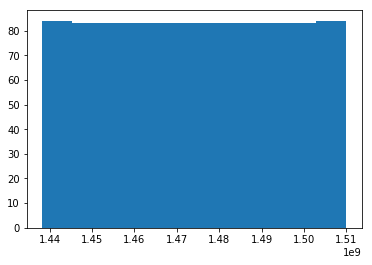

In [5]:
plt.hist(df['UnixTimeStamp'])

(array([ 596.,   46.,   17.,    5.,   14.,   24.,   22.,   72.,   28.,    8.]),
 array([   0.   ,   39.466,   78.932,  118.398,  157.864,  197.33 ,
         236.796,  276.262,  315.728,  355.194,  394.66 ]),
 <a list of 10 Patch objects>)

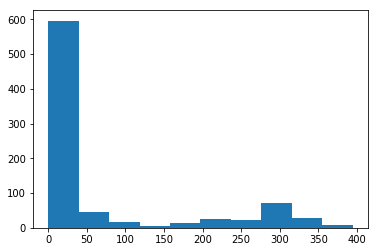

In [6]:
plt.hist(df['eth_etherprice'])

In [7]:
p=np.array(df['eth_etherprice'])

# calculate log return of everyday

In [8]:
r1=[]

In [9]:
for i in range(len(p)-1):
    r1.append(np.log(p[i+1]/p[i]))

/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [10]:
data = []

In [11]:
for i in range(len(r1)):
    data.append(r1[i:i+11])

In [12]:
#price.shift(1)

In [13]:
columns=['pv9','pv8','pv7','pv6','pv5','pv4','pv3','pv2','pv1','td','y']
data = pd.DataFrame(data,columns=columns)

In [14]:
data

,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf
1,NaN,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf
2,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693
3,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630
4,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056
5,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000
6,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851
7,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446
8,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326
9,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373


In [15]:
dt=df[['UnixTimeStamp','eth_etherprice']].iloc[10:]

In [16]:
dt=dt.reset_index()

In [17]:
dt['UnixTimeStamp'] = pd.to_datetime(dt['UnixTimeStamp'],unit='s')   

In [18]:
dt[['pv9','pv8','pv7','pv6','pv5','pv4','pv3','pv2','pv1','td','y']]=data[['pv9','pv8','pv7','pv6','pv5','pv4','pv3','pv2','pv1','td','y']]

In [19]:
dt=dt[['UnixTimeStamp','eth_etherprice','pv9','pv8','pv7','pv6','pv5','pv4','pv3','pv2','pv1','td','y']]

In [20]:
dt

,UnixTimeStamp,eth_etherprice,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
0,2015-08-09,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf
1,2015-08-10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf
2,2015-08-11,0.99,NaN,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693
3,2015-08-12,1.29,NaN,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630
4,2015-08-13,1.88,NaN,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056
5,2015-08-14,1.79,NaN,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000
6,2015-08-15,1.79,NaN,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851
7,2015-08-17,1.30,inf,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446
8,2015-08-16,1.37,-0.916291,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326
9,2015-08-18,1.36,0.000000,-inf,inf,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373


In [21]:
dt=dt.replace([np.inf, -np.inf], np.nan)

In [22]:
dt

,UnixTimeStamp,eth_etherprice,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
0,2015-08-09,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.916291,0.000000,NaN
1,2015-08-10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.916291,0.000000,NaN,NaN
2,2015-08-11,0.99,NaN,NaN,NaN,NaN,NaN,NaN,-0.916291,0.000000,NaN,NaN,0.264693
3,2015-08-12,1.29,NaN,NaN,NaN,NaN,NaN,-0.916291,0.000000,NaN,NaN,0.264693,0.376630
4,2015-08-13,1.88,NaN,NaN,NaN,NaN,-0.916291,0.000000,NaN,NaN,0.264693,0.376630,-0.049056
5,2015-08-14,1.79,NaN,NaN,NaN,-0.916291,0.000000,NaN,NaN,0.264693,0.376630,-0.049056,0.000000
6,2015-08-15,1.79,NaN,NaN,-0.916291,0.000000,NaN,NaN,0.264693,0.376630,-0.049056,0.000000,-0.319851
7,2015-08-17,1.30,NaN,-0.916291,0.000000,NaN,NaN,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446
8,2015-08-16,1.37,-0.916291,0.000000,NaN,NaN,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326
9,2015-08-18,1.36,0.000000,NaN,NaN,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373


In [23]:
dt=dt.dropna(axis=0,how='any')

In [24]:
dt.describe()

,eth_etherprice,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,69.477095,0.007035,0.006752,0.006298,0.006346,0.006286,0.006662,0.006680,0.006670,0.006769,0.006520,0.006566
std,112.138079,0.080776,0.080271,0.079208,0.079187,0.079209,0.078377,0.078389,0.078391,0.078316,0.078009,0.077984
min,0.420000,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204,-0.373204
25%,7.510000,-0.028297,-0.028297,-0.028297,-0.028171,-0.028297,-0.028171,-0.028171,-0.028171,-0.028018,-0.028018,-0.027054
50%,11.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.090000,0.035367,0.035367,0.035091,0.035091,0.035091,0.035091,0.035091,0.035091,0.035091,0.034486,0.034486
max,394.660000,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992,0.382992


# if next day log(return)>0 , true; else false

In [25]:
dt['y']=dt['y']>0

/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
len(dt)
n=809/2

#  create dt1 for regression and KNN prediction

In [27]:
dt1=dt[['pv9','pv8','pv7','pv6','pv5','pv4','pv3','pv2','pv1','td','y']]

In [28]:
dt1

,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
12,0.264693,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373,0.203599,-0.054067,False
13,0.376630,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,False
14,-0.049056,0.000000,-0.319851,0.052446,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,False
15,0.000000,-0.319851,0.052446,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,True
16,-0.319851,0.052446,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,False
17,0.052446,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,-0.073502,False
18,-0.007326,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,-0.073502,-0.034486,True
19,-0.092373,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,-0.073502,-0.034486,0.131336,False
20,0.203599,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,-0.073502,-0.034486,0.131336,-0.096850,True
21,-0.054067,-0.028171,-0.036368,-0.084993,0.023906,-0.073502,-0.034486,0.131336,-0.096850,0.112117,False


# partitioning data to training and testing

In [29]:
df_train, df_test = dt1.iloc[:n], dt1.iloc[n:]
print len(df_train), len(df_test)

404 405


In [30]:
X_train, y_train = df_train[df_train.columns.drop('y')], df_train['y']

In [31]:
X_test, y_test = df_test[df_test.columns.drop('y')], df_test['y']

# KNN

In [32]:
mypipeline = Pipeline([
    ('mybestimputer',Imputer()),
    ('mysuperscaler',StandardScaler()),
    ('knn',KNeighborsClassifier())    
])

In [33]:
mypipeline.fit(X_train, y_train)
yk_pred = mypipeline.predict(X_test)

In [34]:
yk_pred

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [35]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, yk_pred).ravel()

In [36]:
tpr = float(tp)/(tp+fn) 
tnr = float(tn)/(tn+fp) 
ppv = float(tp)/(tp+fp) 
npv = float(tn)/(tn+fn) 
f1=2.0/(1.0/ppv+1.0/tpr)

In [37]:
 dk = pd.DataFrame({'tpr':[tpr],
                    'tnr':[tnr],
                     'ppv':[ppv],
                     'npv':[npv],
                     'f1':[f1]
                    })

In [38]:
dk

,f1,npv,ppv,tnr,tpr
0,0.517815,0.505435,0.493213,0.453659,0.545


f1 for KNN ids %51.78

# logtistic regression

In [39]:
mypipeline = Pipeline([
    ('mybestimputer',Imputer()),
    ('mysuperscaler',StandardScaler()),
    ('masteralg',LogisticRegression())    
])

In [40]:
mypipeline.fit(X_train, y_train)
yr_pred = mypipeline.predict(X_test)

In [41]:
yr_pred

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False,

In [42]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, yr_pred).ravel()

In [43]:
tpr = float(tp)/(tp+fn) # recall or true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # precision or positive predictive power
npv = float(tn)/(tn+fn) # negative predictive power
f1=2.0/(1.0/ppv+1.0/tpr)

In [44]:
 dr = pd.DataFrame({'tpr':[tpr],
                    'tnr':[tnr],
                     'ppv':[ppv],
                     'npv':[npv],
                     'f1':[f1]
                    })

In [45]:
dr

,f1,npv,ppv,tnr,tpr
0,0.473829,0.528926,0.527607,0.62439,0.43


f1 for logistic regression is 47.38

# part 2

# KNN

In [46]:
dt_test =  dt.iloc[404:]

In [47]:
dt_test

,UnixTimeStamp,eth_etherprice,pv9,pv8,pv7,pv6,pv5,pv4,pv3,pv2,pv1,td,y
416,2016-09-29,13.17,0.042660,0.129657,-0.070352,-0.045479,0.018890,-0.034263,0.010786,-0.012336,0.015397,0.006093,True
417,2016-09-28,13.30,0.129657,-0.070352,-0.045479,0.018890,-0.034263,0.010786,-0.012336,0.015397,0.006093,0.009823,False
418,2016-09-30,13.24,-0.070352,-0.045479,0.018890,-0.034263,0.010786,-0.012336,0.015397,0.006093,0.009823,-0.004521,False
419,2016-10-01,13.21,-0.045479,0.018890,-0.034263,0.010786,-0.012336,0.015397,0.006093,0.009823,-0.004521,-0.002268,True
420,2016-10-02,13.23,0.018890,-0.034263,0.010786,-0.012336,0.015397,0.006093,0.009823,-0.004521,-0.002268,0.001513,True
421,2016-10-03,13.45,-0.034263,0.010786,-0.012336,0.015397,0.006093,0.009823,-0.004521,-0.002268,0.001513,0.016492,False
422,2016-10-04,13.32,0.010786,-0.012336,0.015397,0.006093,0.009823,-0.004521,-0.002268,0.001513,0.016492,-0.009712,False
423,2016-10-05,13.09,-0.012336,0.015397,0.006093,0.009823,-0.004521,-0.002268,0.001513,0.016492,-0.009712,-0.017418,False
424,2016-10-06,12.87,0.015397,0.006093,0.009823,-0.004521,-0.002268,0.001513,0.016492,-0.009712,-0.017418,-0.016950,False
425,2016-10-07,12.68,0.006093,0.009823,-0.004521,-0.002268,0.001513,0.016492,-0.009712,-0.017418,-0.016950,-0.014873,False


In [48]:
dt_test,len(yk_pred)

(    UnixTimeStamp  eth_etherprice       pv9       pv8       pv7       pv6  \
 416    2016-09-29           13.17  0.042660  0.129657 -0.070352 -0.045479   
 417    2016-09-28           13.30  0.129657 -0.070352 -0.045479  0.018890   
 418    2016-09-30           13.24 -0.070352 -0.045479  0.018890 -0.034263   
 419    2016-10-01           13.21 -0.045479  0.018890 -0.034263  0.010786   
 420    2016-10-02           13.23  0.018890 -0.034263  0.010786 -0.012336   
 421    2016-10-03           13.45 -0.034263  0.010786 -0.012336  0.015397   
 422    2016-10-04           13.32  0.010786 -0.012336  0.015397  0.006093   
 423    2016-10-05           13.09 -0.012336  0.015397  0.006093  0.009823   
 424    2016-10-06           12.87  0.015397  0.006093  0.009823 -0.004521   
 425    2016-10-07           12.68  0.006093  0.009823 -0.004521 -0.002268   
 426    2016-10-08           12.24  0.009823 -0.004521 -0.002268  0.001513   
 427    2016-10-09           12.06 -0.004521 -0.002268  0.001513

In [49]:
dt_test['yk_pred']=yk_pred


/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
dt1_test=dt_test[['UnixTimeStamp','eth_etherprice','y','yk_pred']]

In [51]:
dt1_test

,UnixTimeStamp,eth_etherprice,y,yk_pred
416,2016-09-29,13.17,True,True
417,2016-09-28,13.30,False,False
418,2016-09-30,13.24,False,True
419,2016-10-01,13.21,True,True
420,2016-10-02,13.23,True,True
421,2016-10-03,13.45,False,True
422,2016-10-04,13.32,False,True
423,2016-10-05,13.09,False,False
424,2016-10-06,12.87,False,True
425,2016-10-07,12.68,False,True


#  creating new dataset(dt1_test) for buy and sell

In [55]:
cash=[1000,]
share=[0,]

# strategy 1:    if you have cash and you predict the price will go up the next day: buy as much ethereum as you can. If you predict the price will go down and you own ethereum: sell it all.

In [56]:
for i in range(0,len(dt_test)):

    if i==404:
        sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
        share.append(share[i]-share[i])
        cash.append(cash[i]+sell)
    else:
        if share[i]<=0:
            if (dt1_test['yk_pred'].iloc[i] ==True):
                if cash[i]>dt1_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt1_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                  
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                    
            else:
                cash.append(cash[i])
                share.append(share[i])
              
        else:
            if (dt1_test['yk_pred'].iloc[i] ==True):
                if cash[i]>dt1_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt1_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
               
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                    
            else:
                sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
                share.append(share[i]-share[i])
                cash.append(cash[i]+sell)
print i
print share
print cash
  

404
[0, 75.930144267274102, 0.0, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 0.0, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 77.578071714704691, 0.0, 77.127410717191879, 77.127410717191879, 77.127410717191879, 77.127410717191879, 77.127410717191879, 77.127410717191879, 77.127410717191879, 77.127410717191879, 0.0, 82.249442805244072, 82.249442805244072, 0.0, 83.473620558624447, 83.473620558624447, 83.473620558624447, 0.0, 0.0, 0.0, 85.234990533714694, 0.0, 86.997368157532094, 86.997368157532094, 86.997368157532094, 86.997368157532094, 86.997368157532094, 86.997368157532094, 0.0, 0.0, 87.434540861841313, 87.434540861841313, 87.434540861841313, 87.434540861841313, 0.0, 84.946566121870219, 84.946566121870219, 84.946566121870219, 84.946566121

# showing everyday transaction of cash and shares

In [57]:
cash

[1000,
 0,
 1009.8709187547456,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 998.42978296824924,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 929.38529914216224,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 854.57171074648602,
 0.0,
 0.0,
 897.34142100521285,
 0.0,
 0.0,
 0.0,
 929.06139681749016,
 929.06139681749016,
 929.06139681749016,
 0.0,
 925.65199719614156,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 869.97368157532094,
 869.97368157532094,
 0.0,
 0.0,
 0.0,
 0.0,
 835.87421063920294,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 756.87390414586366,
 0.0,
 0.0,
 750.75598575207493,
 750.75598575207493,
 750.75598575207493,
 750.75598575207493,
 0.0,
 666.12169027604534,
 0.0,
 730.89567855518771,
 0.0,
 750.26881702291553,
 750.26881702291553,
 750.26881702291553,
 750.26881702291553,
 750.26881702291553,
 0.0,
 707.42235967166755,
 0.0,
 0.0,
 0.0,
 685.79416014030448,
 0.0,
 711.09354944719314,
 0.0,
 0.0,
 0.0,
 0.0,
 671.07126852280931,
 0.0,
 710.49083954093237,
 710.490

In [58]:
share

[0,
 75.930144267274102,
 0.0,
 76.274238576642418,
 76.274238576642418,
 76.274238576642418,
 76.274238576642418,
 76.274238576642418,
 0.0,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 77.578071714704691,
 0.0,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 77.127410717191879,
 0.0,
 82.249442805244072,
 82.249442805244072,
 0.0,
 83.473620558624447,
 83.473620558624447,
 83.473620558624447,
 0.0,
 0.0,
 0.0,
 85.234990533714694,
 0.0,
 86.997368157532094,
 86.997368157532094,
 86.997368157532094,
 86.997368157532094,
 86.997368157532094,
 86.997368157532094,
 0.0,
 0.0,
 87.434540861841313,
 87.434540861841313,
 87.434540861841313,
 87.434540861841313,
 0.0,
 84.946566121870219,


In [59]:
networth=cash[405]-1000

In [60]:
networth

5671.0571654392379

# Summary: the net worth on last day for testing data is $5671.06

# Strategy 2: I had bought ethereum on the first day and sold only on the last day

In [62]:
cash=[1000,]
share=[0,]

In [63]:
for i in range(0,len(dt_test)):
   
    if i==404:
        sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
        share.append(share[i]-share[i])
        cash.append(cash[i]+sell)
       
    else:
        if share[i]<=0:
            if (dt1_test['yk_pred'].iloc[i] ==True):
                if cash[i]>dt1_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt1_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                   
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                   
            else:
                cash.append(cash[i])
                share.append(share[i])
              
        else:
            if (dt1_test['yk_pred'].iloc[i] ==True):
                if cash[i]>dt1_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt1_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                   
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                   
            else:
                cash.append(cash[i])
                share.append(share[i])
print i
print share
print cash

404
[0, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267274102, 75.930144267

In [64]:
cash 

[1000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [65]:
networth=cash[405]-1000

In [66]:
networth

21537.585421412299

# Summary:the networth is $21537.59

# if the price is lower than the price I bought, I will sell it later. when the price is large than the price I bought. 

In [67]:
cash=[1000,]
share=[0,]
buyprice=[0,]

In [68]:
for i in range(0,len(dt_test)):
   
    if i==404:
        sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
        share.append(share[i]-share[i])
        cash.append(cash[i]+sell)
        buyprice.append(dt1_test['eth_etherprice'].iloc[i])
       
    else:
        if share[i]>0:
            if dt1_test['eth_etherprice'].iloc[i]>buyprice[i]:
                if (dt1_test['yk_pred'].iloc[i] ==True):
                    cash.append(cash[i])
                    share.append(share[i])
                    buyprice.append(buyprice[i])
                    
                else:
                    sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
                    share.append(share[i]-share[i])
                    cash.append(cash[i]+sell)
                    buyprice.append(buyprice[i])
                    
            else:
                if (dt1_test['yk_pred'].iloc[i] ==True):
                    cash.append(cash[i])
                    share.append(share[i])
                    buyprice.append(buyprice[i])
                
                else:
                    if dt1_test['eth_etherprice'].iloc[i]>buyprice[i]:
                        sell=share[i]*dt1_test['eth_etherprice'].iloc[i]
                        share.append(share[i]-share[i])
                        cash.append(cash[i]+sell)
                        buyprice.append(buyprice[i])
                    
                    else:
                        cash.append(cash[i])
                        share.append(share[i])
                        buyprice.append(buyprice[i])
                                   
        else:
            if (dt1_test['yk_pred'].iloc[i] ==True):
                buy=cash[i]/dt1_test['eth_etherprice'].iloc[i]
                share.append(buy)
                cash.append(cash[i]-cash[i])
                buyprice.append(dt1_test['eth_etherprice'].iloc[i])
              
            else:
                cash.append(cash[i])
                share.append(share[i])
                buyprice.append(buyprice[i])
print share
print cash
print buyprice

[0, 75.930144267274102, 0.0, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.274238576642418, 76.27423857

In [69]:
networth=cash[405]-1000

In [70]:
networth

7884.2567956012026

# logistic regression

In [71]:
dt_test['yr_pred']=yr_pred


/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
dt2_test=dt_test[['UnixTimeStamp','eth_etherprice','y','yr_pred']]

In [73]:
dt2_test

,UnixTimeStamp,eth_etherprice,y,yr_pred
416,2016-09-29,13.17,True,False
417,2016-09-28,13.30,False,False
418,2016-09-30,13.24,False,False
419,2016-10-01,13.21,True,False
420,2016-10-02,13.23,True,False
421,2016-10-03,13.45,False,False
422,2016-10-04,13.32,False,True
423,2016-10-05,13.09,False,True
424,2016-10-06,12.87,False,False
425,2016-10-07,12.68,False,False


In [74]:
cash=[1000,]
share=[0,]

# strategy 1 in logtistic regression 

In [75]:
for i in range(0,len(dt2_test)):

    if i==404:
        sell=share[i]*dt2_test['eth_etherprice'].iloc[i]
        share.append(share[i]-share[i])
        cash.append(cash[i]+sell)
       
    else:
        if share[i]<=0:
            if (dt2_test['yr_pred'].iloc[i] ==True):
                if cash[i]>dt2_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt2_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                  
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                    
            else:
                cash.append(cash[i])
                share.append(share[i])
             
        else:
            if (dt2_test['yr_pred'].iloc[i] ==True):
                if cash[i]>dt2_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt2_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                   
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                 
            else:
                sell=share[i]*dt2_test['eth_etherprice'].iloc[i]
                share.append(share[i]-share[i])
                cash.append(cash[i]+sell)
print share
print cash
               

[0, 0, 0, 0, 0, 0, 0, 75.075075075075077, 75.075075075075077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 80.652438749266793, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 87.713166690312718, 87.713166690312718, 0.0, 0.0, 91.548067931656632, 0.0, 0.0, 0.0, 89.158424394286655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.80679156053246, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.18719994804012, 0.0, 0.0, 111.9077225041635, 111.9077225041635, 0.0, 0.0, 0.0, 119.6608065469356, 0.0, 0.0, 141.30349353076102, 0.0, 0.0, 129.55657659868569, 129.55657659868569, 129.55657659868569, 0.0, 0.0, 126.47189620347888, 126.47189620347888, 126.47189620347888, 0.0, 0.0, 0.0, 130.46049739780671, 0.0, 0.0, 129.60669833106715, 129.60669833106715, 0.0, 0.0, 0.0, 131.05684320749867, 0.0, 0.0, 121.58091949519179, 121.58091949519179, 0.0, 0.0, 0.0, 90.962195284086505, 90.962195284086505, 90.962195284086505, 0.0, 0.0, 87.216693125330011, 87.216693125330011, 87.216693125330011, 0.0, 0.0, 0.0, 0.

In [76]:
networth=cash[405]-1000

In [77]:
networth

1850.9692674075382

# summary: networth in strategy 1(regression) is $1850.97

In [78]:
cash=[1000,]
share=[0,]

In [80]:
for i in range(0,len(dt2_test)):
    if i==404:
        sell=share[i]*dt2_test['eth_etherprice'].iloc[i]
        share.append(share[i]-share[i])
        cash.append(cash[i]+sell)
       
    else:
        if share[i]<=0:
            if (dt2_test['yr_pred'].iloc[i] ==True):
                if cash[i]>dt2_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt2_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                 
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                   
            else:
                cash.append(cash[i])
                share.append(share[i])
              
        else:
            if (dt2_test['yr_pred'].iloc[i] ==True):
                if cash[i]>dt2_test['eth_etherprice'].iloc[i]:
                    buy=cash[i]/dt2_test['eth_etherprice'].iloc[i]
                    share.append(buy)
                    cash.append(cash[i]-cash[i])
                    
                else:
                    cash.append(cash[i])
                    share.append(share[i])
                    
            else:
                cash.append(cash[i])
                share.append(share[i])
print share
print cash
              

[0, 0, 0, 0, 0, 0, 0, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077, 75.075075075075077

In [81]:
networth=cash[405]-1000

In [82]:
networth

21283.783783783783

# the networth in strategy2(regression) is $21283